In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from common import Sphere, Oracle, normalize
from lpme import LPME, compute_vector

# Setup

In [6]:
np.random.seed(7)
nc = 5 # number of classes
r = np.random.uniform(0, 10) # sphere radius
search_tol = 1e-2 # search tolerance

q = nc**2 - nc

# Experiment runs and Visulization

In [44]:
num_itr = 100
step = 0.01

re_arr = np.zeros((50,num_itr))

for itr in range(num_itr):
    # search space is a Sphere
    sphere = Sphere(np.random.randn(q), r, q)

    # linear performance metric
    a = np.random.randn(q)
    a = normalize(a)
    
    B = np.matrix(np.zeros((q, q)))
    
    oracle = Oracle(a, B)
    lpm = LPME(sphere, oracle, search_tol)
    # print(itr)
    
    for lp, al in enumerate(np.arange(0., .5, step)):
        ahat = lpm.run_lpme(al)
        re_arr[lp][itr] = np.linalg.norm(ahat - a)

re_max = np.amax(re_arr, 1)
re_min = np.amin(re_arr, 1)
re_mean = np.mean(re_arr, 1)
re_median = np.median(re_arr, 1)
re_std = np.std(re_arr, 1)

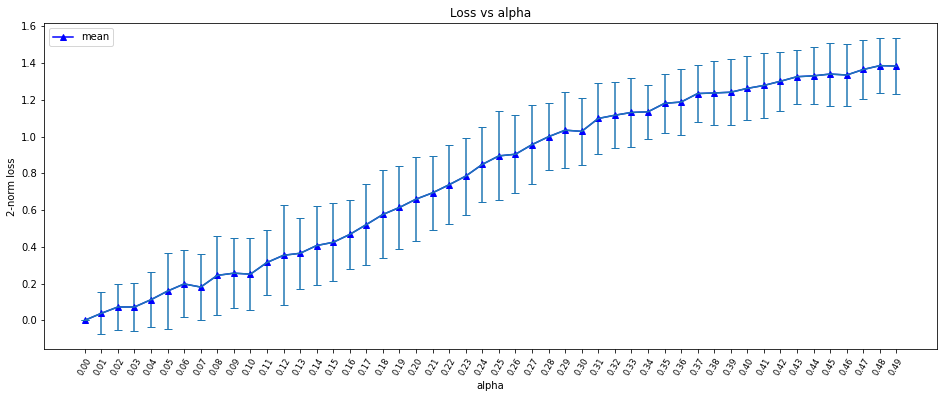

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

# ax.plot(np.arange(0., 1., step), re_max, "-", color='b', alpha=0.2) # plot maximum deviation
# ax.plot(np.arange(0., 1., step), re_min, "-", color='b', alpha=0.2) # plot minimum deviation
ax.plot(np.arange(0., .5, step), re_mean, "^-", color='b', alpha=1, label='mean') # plot mean relative error
ax.errorbar(np.arange(0., .5, step), re_mean, yerr=re_std, capsize=4)

'''
The following code block is currently ignored. To show the distribution intervals, unanotate the code.
'''
# cm = plt.get_cmap('viridis')
# i=0
# up_prev = re_median
# low_prev = re_median
# for i,pct in enumerate(range(40, 0, -10)):

#   re_up = np.percentile(re_arr, 100-pct, 1)
#   re_low = np.percentile(re_arr, pct, 1)
#   ax.fill_between(np.arange(0., .5, step), re_up, up_prev, color=cm.colors[i*60], alpha=pct/100+0.3, label=str(100-2*pct)+'% interval')
#   ax.fill_between(np.arange(0., .5, step), re_low, low_prev, color=cm.colors[i*60], alpha=pct/100+0.3)
#   up_prev = re_up
#   low_prev = re_low

# ax.fill_between(np.arange(0., .5, step), re_max, up_prev, color=cm.colors[(i+1)*60], alpha=0.3, label='100% interval')
# ax.fill_between(np.arange(0., .5, step), re_min, low_prev, color=cm.colors[(i+1)*60], alpha=0.3)

#----------------------------------------------------------------------------------------------------------------------

plt.xticks(np.arange(0, .5, step=step), rotation=60, size="small")
plt.title("Loss vs alpha")
plt.xlabel("alpha")
plt.ylabel("2-norm loss")
plt.legend(loc='upper left')
# plt.grid()
plt.show()

In [45]:
num_itr = 100
step = 0.01

re_arr_nPTA = np.zeros((50,num_itr))

for itr in range(num_itr):
    # search space is a Sphere
    sphere = Sphere(np.random.randn(q), r, q)

    # linear performance metric
    a = np.random.randn(q)
    a = normalize(a)
    
    B = np.matrix(np.zeros((q, q)))
    
    oracle = Oracle(a, B)
    lpm = LPME(sphere, oracle, search_tol)
    # print(itr)
    
    for lp, al in enumerate(np.arange(0., .5, step)):
        ahat = lpm.run_lpme_nPTA(al)
        re_arr_nPTA[lp][itr] = np.linalg.norm(ahat - a)

re_max_nPTA = np.amax(re_arr_nPTA, 1)
re_min_nPTA = np.amin(re_arr_nPTA, 1)
re_mean_nPTA = np.mean(re_arr_nPTA, 1)
re_median_nPTA = np.median(re_arr_nPTA, 1)
re_std_nPTA = np.std(re_arr_nPTA, 1)

Compare PTA and nPTA performance, using std as errorbar

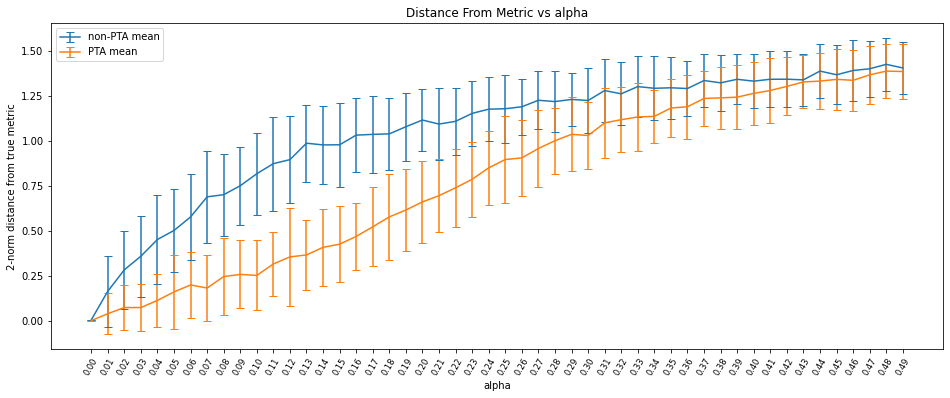

<Figure size 432x288 with 0 Axes>

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

# ax.plot(np.arange(0., .5, step), re_max, "-", color='b', alpha=0.2) # plot maximum deviation
# ax.plot(np.arange(0., .5, step), re_min, "-", color='b', alpha=0.2) # plot minimum deviation
# ax.plot(np.arange(0., .5, step), re_mean_nPTA, "-", alpha=1, label='non-PTA mean',color='y') # plot mean relative error
# ax.plot(np.arange(0., .5, step), re_mean, "-", alpha=1, label='PTA mean',color='g') # plot mean relative error
ax.errorbar(np.arange(0., .5, step), re_mean_nPTA, yerr=re_std_nPTA, capsize=4,label='non-PTA mean')
ax.errorbar(np.arange(0., .5, step), re_mean, yerr=re_std, capsize=4,label='PTA mean')

# plt.yticks(np.arange(0, 1, step=0.1))
plt.xticks(np.arange(0, .5, step=step), rotation=60, size="small")
plt.title("Distance From Metric vs alpha")
# plt.grid()
plt.xlabel("alpha")
plt.ylabel("2-norm distance from true metric")
plt.legend(loc='upper left')
plt.show()
plt.savefig('Loss vs alpha (std)')

Compare PTA and nPTA performance, using hoeffding bound as errorbar

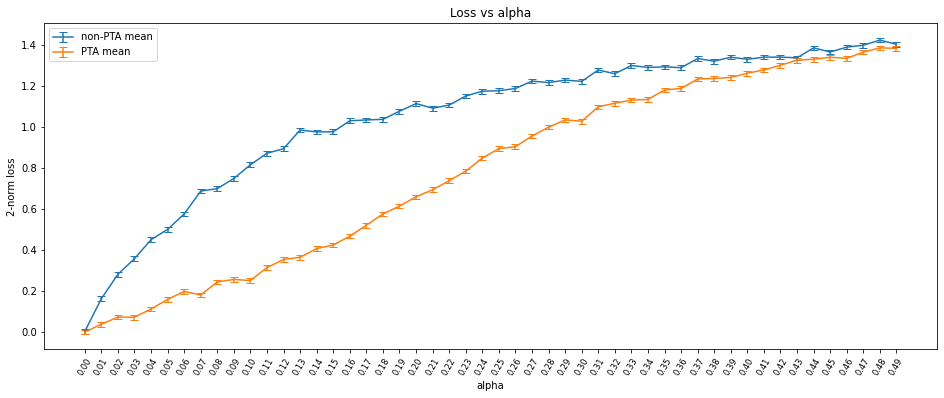

<Figure size 432x288 with 0 Axes>

In [48]:
re_hoeffding = np.sqrt(-np.log(0.975)/(2*100))
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

# ax.plot(np.arange(0., .5, step), re_max, "-", color='b', alpha=0.2) # plot maximum deviation
# ax.plot(np.arange(0., .5, step), re_min, "-", color='b', alpha=0.2) # plot minimum deviation
# ax.plot(np.arange(0., .5, step), re_mean_nPTA, "-", alpha=1, label='non-PTA mean',color='y') # plot mean relative error
# ax.plot(np.arange(0., .5, step), re_mean, "-", alpha=1, label='PTA mean',color='g') # plot mean relative error
ax.errorbar(np.arange(0., .5, step), re_mean_nPTA, yerr=re_hoeffding, capsize=4,label='non-PTA mean')
ax.errorbar(np.arange(0., .5, step), re_mean, yerr=re_hoeffding, capsize=4,label='PTA mean')

# plt.yticks(np.arange(0, 1, step=0.1))
plt.xticks(np.arange(0, .5, step=step), rotation=60, size="small")
plt.title("Loss vs alpha")
# plt.grid()
plt.xlabel("alpha")
plt.ylabel("2-norm loss")
plt.legend(loc='upper left')
plt.show()
plt.savefig('Loss vs alpha (std)')

# Compare performance over num_class

PTA version

In [11]:
num_itr = 100
step = 0.1

num_class = np.array([2,5,8,10])
re_arr = np.zeros((len(num_class), 6,num_itr))

for i in num_class:

    nc = i # number of classes
    q = nc**2 - nc

    for itr in range(num_itr):
        
        r = np.random.uniform(0, 10) # sphere radius
        # search space is a Sphere
        sphere = Sphere(np.random.randn(q), r, q)
        
        # linear performance metric
        a = np.random.randn(q)
        a = normalize(a)
        
        B = np.matrix(np.zeros((q, q)))

        oracle = Oracle(a, B)
        lpm = LPME(sphere, oracle, search_tol)
        # print(itr)

        for lp, al in enumerate(np.arange(0., .55, step)):
            ahat = lpm.run_lpme(al)
            re_arr[np.argwhere(num_class==i)[0][0]][lp][itr] = np.linalg.norm(ahat - a)

re_max = np.amax(re_arr, 2)
re_min = np.amin(re_arr, 2)
re_mean = np.mean(re_arr, 2)
re_median = np.median(re_arr, 2)
re_std = np.std(re_arr, 2)

Compare PTA performance over different num_class, using hoeffding bound as errorbar

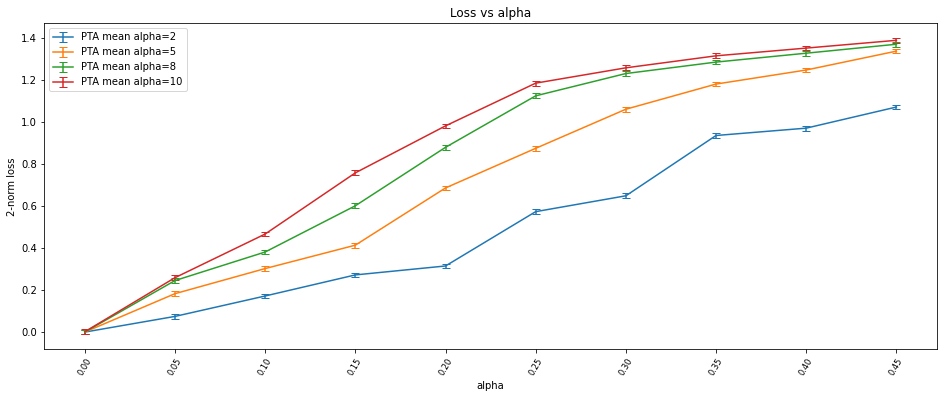

In [20]:
# num_class = np.arange(2,11)
re_hoeffding = np.sqrt(-np.log(0.975)/(2*100))

fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

for i in num_class:
    ax.errorbar(np.arange(0., .5, step), re_mean[np.argwhere(num_class==i)[0][0]], yerr=re_hoeffding, capsize=4,label='PTA mean num_class={}'.format(i))

    # plt.yticks(np.arange(0, 1, step=0.1))
    plt.xticks(np.arange(0, .5, step=step), rotation=60, size="small")
    plt.title("Loss vs alpha for Different num_class")
    # plt.grid()
    plt.xlabel("alpha")
    plt.ylabel("2-norm loss")
    plt.legend(loc='upper left')
plt.show()
# plt.savefig('Loss vs num_class (std)')

nPTA version

In [12]:
num_itr = 100
step = 0.1

num_class = np.array([2,5,8,10])
re_arr_nPTA = np.zeros((len(num_class), 6,num_itr))

for i in num_class:

    nc = i # number of classes
    q = nc**2 - nc

    for itr in range(num_itr):
        
        r = np.random.uniform(0, 10) # sphere radius
        # search space is a Sphere
        sphere = Sphere(np.random.randn(q), r, q)
        
        # linear performance metric
        a = np.random.randn(q)
        a = normalize(a)
        
        B = np.matrix(np.zeros((q, q)))

        oracle = Oracle(a, B)
        lpm = LPME(sphere, oracle, search_tol)
        # print(itr)

        for lp, al in enumerate(np.arange(0., .55, step)):
            ahat = lpm.run_lpme_nPTA(al)
            re_arr_nPTA[np.argwhere(num_class==i)[0][0]][lp][itr] = np.linalg.norm(ahat - a)

re_max_nPTA = np.amax(re_arr_nPTA, 2)
re_min_nPTA = np.amin(re_arr_nPTA, 2)
re_mean_nPTA = np.mean(re_arr_nPTA, 2)
re_median_nPTA = np.median(re_arr_nPTA, 2)
re_std_nPTA = np.std(re_arr_nPTA, 2)

Compare PTA and nPTA performance, using std as errorbar

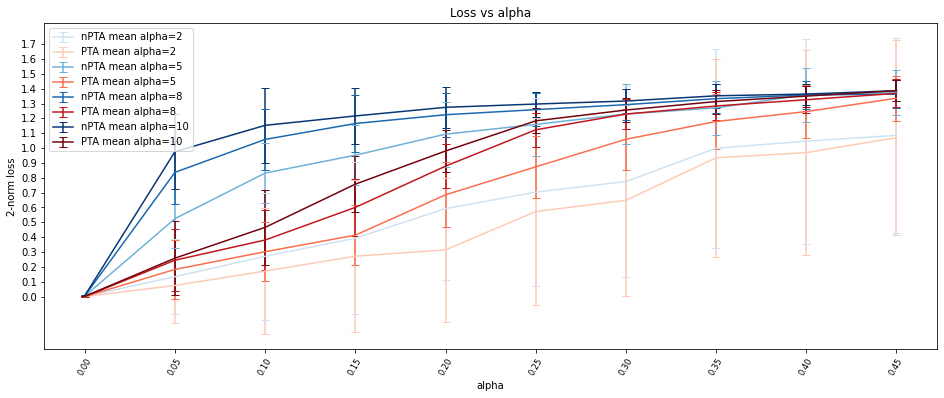

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

cm1 = plt.get_cmap('Blues')
cm2 = plt.get_cmap('Reds')

for i in num_class:
    ax.errorbar(np.arange(0., .5, step), re_mean_nPTA[np.argwhere(num_class==i)[0][0]], yerr=re_std[np.argwhere(num_class==i)[0][0]], capsize=4,label='nPTA mean num_class={}'.format(i), color=cm1(i*25/256))
    ax.errorbar(np.arange(0., .5, step), re_mean[np.argwhere(num_class==i)[0][0]], yerr=re_std[np.argwhere(num_class==i)[0][0]], capsize=4,label='PTA mean num_class={}'.format(i), color=cm2(i*25/256))
    
#     plt.yticks(np.arange(0, 1.75, step=0.1))
    plt.xticks(np.arange(0, .5, step=step), rotation=60, size="small")
    plt.title("Loss vs alpha for Different num_class")
    # plt.grid()
    plt.xlabel("alpha")
    plt.ylabel("2-norm loss")
    plt.legend(loc='upper left')
plt.show()

Compare PTA and nPTA performance, using hoeffding bound as errorbar

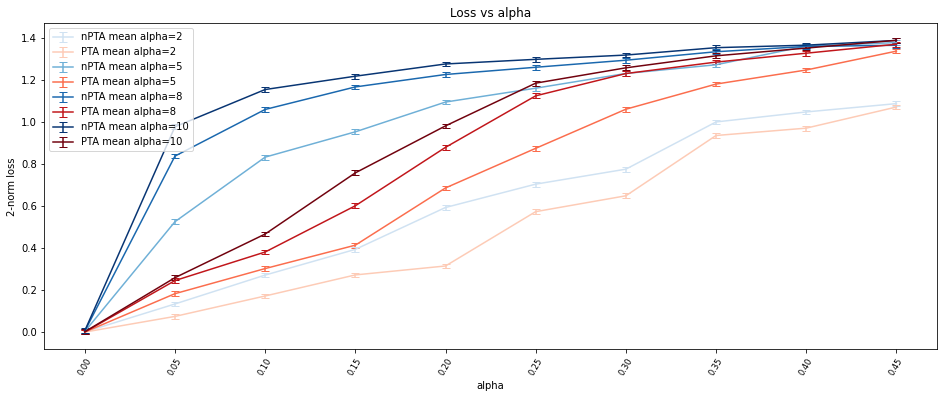

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

cm1 = plt.get_cmap('Blues')
cm2 = plt.get_cmap('Reds')

for i in num_class:
    ax.errorbar(np.arange(0., .5, step), re_mean_nPTA[np.argwhere(num_class==i)[0][0]], yerr=re_hoeffding, capsize=4,label='nPTA mean num_class={}'.format(i), color=cm1(i*25/256))
    ax.errorbar(np.arange(0., .5, step), re_mean[np.argwhere(num_class==i)[0][0]], yerr=re_hoeffding, capsize=4,label='PTA mean num_class={}'.format(i), color=cm2(i*25/256))
    
    # plt.yticks(np.arange(0, 1, step=0.1))
    plt.xticks(np.arange(0, .5, step=step), rotation=60, size="small")
    plt.title("Loss vs alpha for Different num_class")
    # plt.grid()
    plt.xlabel("alpha")
    plt.ylabel("2-norm loss")
    plt.legend(loc='upper left')
plt.show()

# Output data

In [14]:
for i in num_class:
    print('num_class: '+str(i))
    idx = np.argwhere(num_class==i)[0][0]
    for j in range(6):
        info1 = '  alpha='+str(round(step*j,2))+' nPTA mean: '+str(round(re_mean_nPTA[idx][j],3))+'\u00b1'+str(round(re_std_nPTA[idx][j],3))
        info2 = '           '+' PTA mean:  '+str(round(re_mean[idx][j],3))+'\u00b1'+str(round(re_std[idx][j],3))
        print(info1+'\n'+info2)

num_class: 2
  alpha=0.0 nPTA mean: 0.001±0.0
            PTA mean:  0.0±0.0
  alpha=0.1 nPTA mean: 0.199±0.309
            PTA mean:  0.111±0.289
  alpha=0.2 nPTA mean: 0.545±0.544
            PTA mean:  0.4±0.613
  alpha=0.3 nPTA mean: 0.777±0.61
            PTA mean:  0.66±0.665
  alpha=0.4 nPTA mean: 1.065±0.641
            PTA mean:  1.024±0.673
  alpha=0.5 nPTA mean: 1.19±0.629
            PTA mean:  1.331±0.595
num_class: 5
  alpha=0.0 nPTA mean: 0.003±0.0
            PTA mean:  0.0±0.0
  alpha=0.1 nPTA mean: 0.815±0.227
            PTA mean:  0.293±0.179
  alpha=0.2 nPTA mean: 1.112±0.194
            PTA mean:  0.665±0.202
  alpha=0.3 nPTA mean: 1.243±0.191
            PTA mean:  1.057±0.173
  alpha=0.4 nPTA mean: 1.344±0.175
            PTA mean:  1.279±0.163
  alpha=0.5 nPTA mean: 1.408±0.155
            PTA mean:  1.398±0.161
num_class: 8
  alpha=0.0 nPTA mean: 0.005±0.0
            PTA mean:  0.0±0.0
  alpha=0.1 nPTA mean: 1.067±0.128
            PTA mean:  0.408±0.24
  alp

Output as .csv file

In [11]:
out = open('multirun-data.csv','w')
out.write('num_class,alpha,alg. type,mean\n')
for i in num_class:
    out.write(str(i))
    idx = np.argwhere(num_class==i)[0][0]
    for j in range(0,6):
        info1 = ','+str(round(step*j,2))+',nPTA,'+str(round(re_mean_nPTA[idx][j],3))+'\u00b1'+str(round(re_std_nPTA[idx][j],3))
        info2 = ',,PTA,'+str(round(re_mean[idx][j],3))+'\u00b1'+str(round(re_std[idx][j],3))
        out.write(info1+'\n'+info2+'\n')
out.close()

Output as Latex table

In [44]:
out = open('tables/multirun-table.tex','w')

out.write('\\documentclass{article}\n')
out.write('\\usepackage{array}\n')
out.write('\\usepackage{multirow}\n')
out.write('\\begin{document}\n')
out.write('\\begin{table}[h]\n')
out.write('\\begin{tabular}{|c|c|c|c|}\n')
out.write('\t\\hline\n')
out.write('\t num class & alpha & baseline mean & PTA mean\\\\ ')
out.write('\\hline\n')

for i in num_class:
    # num_class &
    out.write('\t\multirow{{6}}{{*}}{{{}}}\n'.format(str(i)))
    
    for j in range(0,6):
        # alpha & baseline_mean & PTA_mean
        info_alpha = str(round(step*j,2))
        info_baseline = str(round(re_mean_nPTA[idx][j],3))+'$\\pm$'+str(round(re_std_nPTA[idx][j],3))
        info_PTA = str(round(re_mean[idx][j],3))+'$\\pm$'+str(round(re_std[idx][j],3))
        
        out.write('\t\t& {} & {} & {} \\\\ '.format(info_alpha, info_baseline, info_PTA))
        
        if j == 5:
            out.write('\\hline\n')
        else:
            out.write('\\cline{2-4}\n')
    
out.write('\\end{tabular}\n')
out.write('\\end{table}\n')
out.write('\\end{document}\n')
out.close()